### Simulação do Cenário 2 - Opção 2 - Proposta

In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados
Topologia configurada com sucesso para slices!


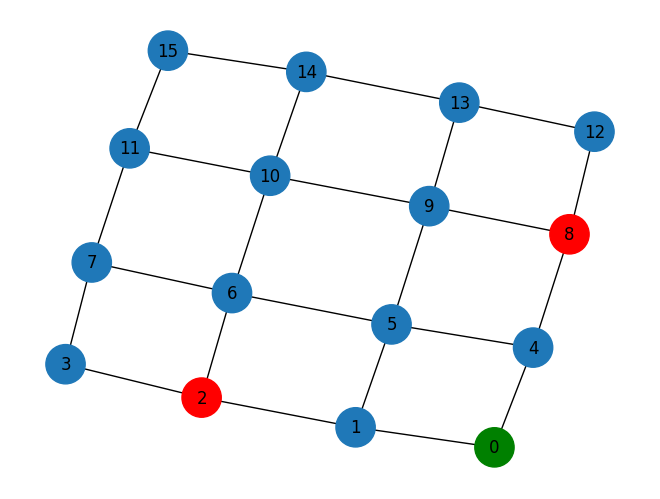

Final Slice 1 Paths: [[8, 4, 0]]
Final Slice 2 Paths: [[2, 6, 5, 4, 0]]


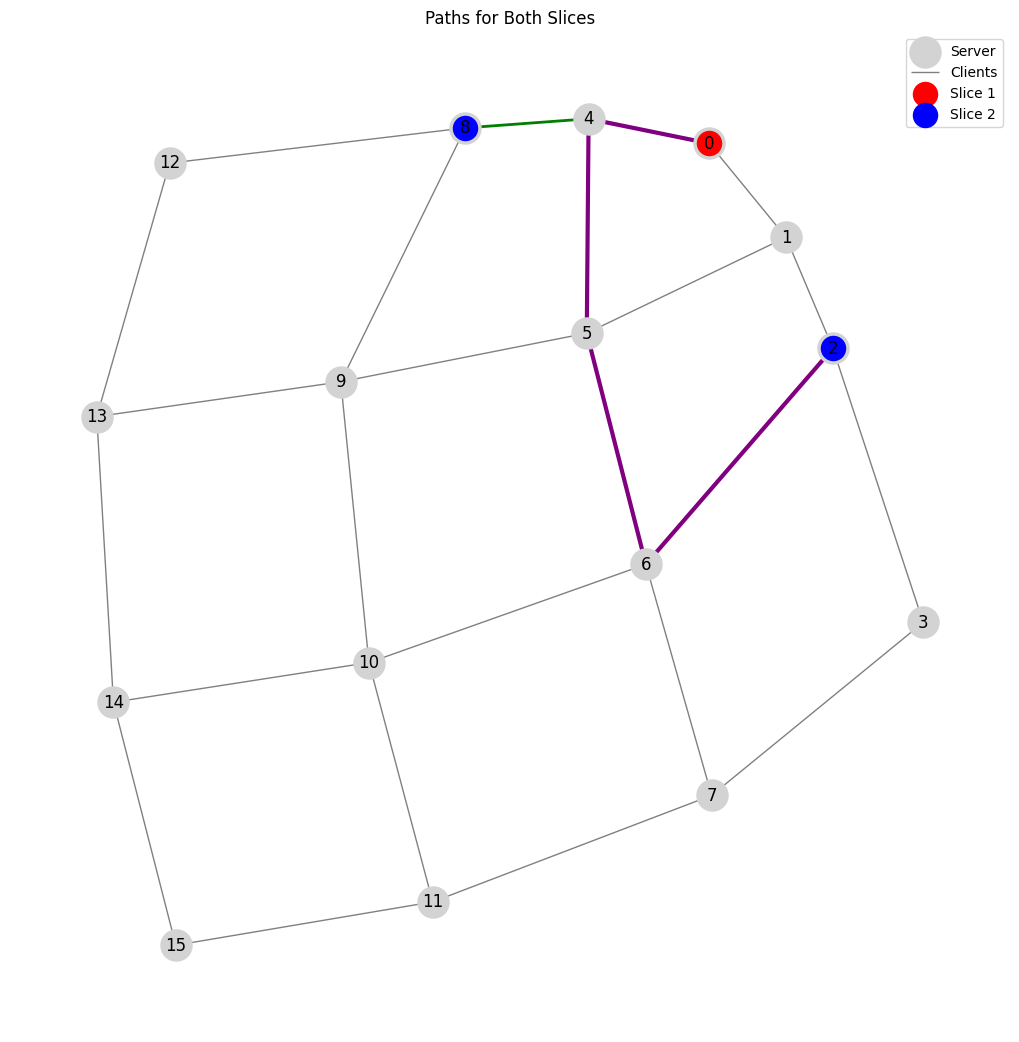

In [2]:
rede = Network()
controlador = Controller(rede)

# Configura uma grade 4x4
clients = [8, 2]
server = 0
rede.set_topology_for_slices(graph_type='grade', dimensions=(4, 4), clients=clients, server=server)


rede.draw()

# Executa a simulação de slices
rede.run_slice_simulation(clients=clients, server=server)
Logger.activate(Logger)



### Nessa parte, eu posso gerar minha requesições, com os protocolos: Childs(AC_BQC) e BFK_BQC.

##### O cenário 2 apresenta o agendamento das requesições de forma que pode-se executar uma requesição de cada protocolo, então a cada timeslot pode-se executar até duas requesições.  

In [3]:
slice_1_paths = rede.final_slice_1_paths  
slice_2_paths = rede.final_slice_2_paths  

controlador.initialize_slices(network=rede, clients=[14,2], server=0, protocols=["AC_BQC", "BFK_BQC"], slice_1_paths=slice_1_paths, slice_2_paths=slice_2_paths)

for _ in range(10):
    protocol = random.choice(["AC_BQC","BFK_BQC"])
    if protocol == "AC_BQC":
        alice_id = 8
        slice_path = rede.final_slice_1_paths[0]  
    elif protocol == "BFK_BQC":
        alice_id = 2
        slice_path = rede.final_slice_2_paths[0]  
    bob_id = 0
    num_qubits = 10
    num_gates = 20

    # Passa o slice_path para garantir a rota correta na requisição
    rede.generate_request_slice(alice_id, bob_id, num_qubits, num_gates, protocol=protocol, slice_path=slice_path,scenario=2)

scheduled_timeslots = rede.send_requests_to_controller(controlador)
slice_paths = controlador.slices  
rede.execute_scheduled_requests(scheduled_timeslots)


2025-01-06 15:53:09,712: Slice slice_1 configurado para protocolo AC_BQC com rotas: {'client': [8, 4, 0]}
2025-01-06 15:53:09,715: Slice slice_2 configurado para protocolo BFK_BQC com rotas: {'client': [2, 6, 5, 4, 0]}
2025-01-06 15:53:09,860: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:09,862: Instrução: {'operation': 'z', 'qubits': [4]}
2025-01-06 15:53:09,862: Instrução: {'operation': 'y', 'qubits': [9]}
2025-01-06 15:53:09,863: Instrução: {'operation': 'h', 'qubits': [1]}
2025-01-06 15:53:09,864: Instrução: {'operation': 'cz', 'qubits': [4, 3]}
2025-01-06 15:53:09,865: Instrução: {'operation': 'cz', 'qubits': [7, 4]}
2025-01-06 15:53:09,865: Instrução: {'operation': 'cx', 'qubits': [1, 8]}
2025-01-06 15:53:09,866: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-06 15:53:09,866: Instrução: {'operation': 'h', 'qubits': [2]}
2025-01-06 15:53:09,867: Instrução: {'operation': 'cx', 'qubits': [8, 4]}
2025-01-06 15:53:09,867: Ins

                                                            
q_0: ───────────────────X───────────────────────────────────
     ┌───┐        ┌───┐ │                                   
q_1: ┤ H ├─────■──┤ H ├─┼───────────────────────────────────
     ├───┤     │  └───┘ │                                   
q_2: ┤ H ├─────┼────X───┼───────X───────────────────────────
     └───┘     │    │   │ ┌───┐ │                           
q_3: ──────■───┼────┼───┼─┤ Z ├─┼────────X──────────────────
     ┌───┐ │   │    │   │ └───┘ │ ┌───┐  │                  
q_4: ┤ Z ├─■───┼────┼───┼───■───┼─┤ X ├──┼──────────────────
     └───┘     │    │   │   │   │ └─┬─┘  │                  
q_5: ──────────┼────X───┼───┼───┼───┼────X──────────────────
               │        │   │   │   │          ┌───┐   ┌───┐
q_6: ──────────┼────────┼───┼───┼───┼────────■─┤ H ├─■─┤ T ├
               │        │   │   │   │        │ └───┘ │ ├───┤
q_7: ──────────┼────────┼───■───┼───┼────────┼───────■─┤ X ├
             ┌─┴─┐      

2025-01-06 15:53:09,974: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:09,975: Instrução: {'operation': 'cx', 'qubits': [2, 8]}
2025-01-06 15:53:09,977: Instrução: {'operation': 'h', 'qubits': [8]}
2025-01-06 15:53:09,979: Instrução: {'operation': 'cz', 'qubits': [1, 5]}
2025-01-06 15:53:09,980: Instrução: {'operation': 'y', 'qubits': [9]}
2025-01-06 15:53:09,981: Instrução: {'operation': 'swap', 'qubits': [0, 9]}
2025-01-06 15:53:09,981: Instrução: {'operation': 'h', 'qubits': [3]}
2025-01-06 15:53:09,982: Instrução: {'operation': 'cx', 'qubits': [5, 4]}
2025-01-06 15:53:09,983: Instrução: {'operation': 'h', 'qubits': [8]}
2025-01-06 15:53:09,983: Instrução: {'operation': 'z', 'qubits': [1]}
2025-01-06 15:53:09,984: Instrução: {'operation': 'h', 'qubits': [5]}
2025-01-06 15:53:09,984: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-06 15:53:09,985: Instrução: {'operation': 'z', 'qubits': [6]}
2025-01-06 15:53:09,985: Instrução:

     ┌───┐                                 
q_0: ┤ T ├─────────────────■─────────■─────
     ├───┤┌───┐            │  ┌───┐  │     
q_1: ┤ H ├┤ X ├───────■────■──┤ Z ├──┼─────
     └───┘└───┘       │  ┌───┐└───┘┌─┴─┐   
q_2: ────────────■────┼──┤ Y ├─────┤ X ├─X─
                 │    │  └───┘     └───┘ │ 
q_3: ────────────┼────■──────────────────┼─
                 │  ┌───┐                │ 
q_4: ───────X────┼──┤ T ├────────────────┼─
            │    │  └───┘                │ 
q_5: ──■────┼────┼───────────────────────┼─
       │    │    │                       │ 
q_6: ──■────┼────■──────────────X────────┼─
            │       ┌───┐┌───┐  │        │ 
q_7: ───────X───────┤ X ├┤ T ├──┼────────┼─
          ┌───┐┌───┐└─┬─┘├───┤  │        │ 
q_8: ─────┤ Y ├┤ Z ├──┼──┤ Z ├──X────────X─
     ┌───┐└───┘└───┘  │  └───┘             
q_9: ┤ H ├────────────■────────────────────
     └───┘                                 
                                            ┌───┐
q_0: ──■──────────────────

2025-01-06 15:53:10,220: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:10,220: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2025-01-06 15:53:10,221: Instrução: {'operation': 'cz', 'qubits': [5, 1]}
2025-01-06 15:53:10,221: Instrução: {'operation': 't', 'qubits': [9]}
2025-01-06 15:53:10,222: Instrução: {'operation': 'cz', 'qubits': [1, 5]}
2025-01-06 15:53:10,222: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-06 15:53:10,223: Instrução: {'operation': 'cx', 'qubits': [8, 6]}
2025-01-06 15:53:10,223: Instrução: {'operation': 'swap', 'qubits': [7, 3]}
2025-01-06 15:53:10,223: Instrução: {'operation': 'cz', 'qubits': [3, 2]}
2025-01-06 15:53:10,224: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2025-01-06 15:53:10,224: Instrução: {'operation': 'z', 'qubits': [3]}
2025-01-06 15:53:10,224: Instrução: {'operation': 'swap', 'qubits': [7, 5]}
2025-01-06 15:53:10,226: Instrução: {'operation': 'h', 'qubits': [4]}
2025-01-06 15:53:

     ┌───┐     ┌───┐   ┌───┐                      
q_0: ┤ S ├─────┤ X ├─■─┤ Z ├───────────■────■───X─
     └───┘     └─┬─┘ │ └───┘           │    │   │ 
q_1: ───────■────┼───┼──────────X──■───┼────■───┼─
     ┌───┐┌─┴─┐  │   │          │  │   │        │ 
q_2: ┤ X ├┤ X ├──┼───┼──────────┼──┼───┼────────┼─
     └───┘└───┘  │   │          │  │   │        │ 
q_3: ────────────┼───┼───────■──┼──■───┼────■───┼─
          ┌───┐  │   │ ┌───┐ │  │      │    │   │ 
q_4: ─────┤ X ├──┼───┼─┤ S ├─┼──┼──────┼────┼───X─
     ┌───┐└─┬─┘  │   │ └───┘ │  │    ┌─┴─┐  │     
q_5: ┤ Z ├──┼────┼───┼───────┼──┼────┤ X ├──┼─────
     ├───┤  │    │   │ ┌───┐ │  │    └───┘  │     
q_6: ┤ Y ├──■────┼───┼─┤ H ├─┼──┼───────────┼─────
     └───┘       │   │ └───┘ │  │           │     
q_7: ────────────■───┼───────┼──X───────────┼─────
     ┌───┐           │       │              │     
q_8: ┤ X ├──X────────■───────┼──────────────┼─────
     └───┘  │                │            ┌─┴─┐   
q_9: ───────X────────────────■─

2025-01-06 15:53:10,488: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:10,488: Instrução: {'operation': 'swap', 'qubits': [9, 8]}
2025-01-06 15:53:10,489: Instrução: {'operation': 'cz', 'qubits': [6, 9]}
2025-01-06 15:53:10,489: Instrução: {'operation': 's', 'qubits': [8]}
2025-01-06 15:53:10,490: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-06 15:53:10,490: Instrução: {'operation': 'cz', 'qubits': [4, 5]}
2025-01-06 15:53:10,490: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2025-01-06 15:53:10,490: Instrução: {'operation': 'swap', 'qubits': [9, 3]}
2025-01-06 15:53:10,491: Instrução: {'operation': 'z', 'qubits': [4]}
2025-01-06 15:53:10,493: Instrução: {'operation': 'x', 'qubits': [2]}
2025-01-06 15:53:10,494: Instrução: {'operation': 's', 'qubits': [2]}
2025-01-06 15:53:10,494: Instrução: {'operation': 'cz', 'qubits': [9, 3]}
2025-01-06 15:53:10,496: Instrução: {'operation': 'x', 'qubits': [3]}
2025-01-06 15:53:10,497: 

     ┌───┐┌───┐┌───┐                             
q_0: ┤ X ├┤ S ├┤ S ├─────────────────────────────
     └─┬─┘└───┘├───┤┌───┐             ┌───┐      
q_1: ──┼────X──┤ X ├┤ Z ├───────────X─┤ T ├────■─
       │    │  └─┬─┘└───┘     ┌───┐ │ └───┘    │ 
q_2: ──┼────X────┼─────────■──┤ Y ├─┼───────X──┼─
       │  ┌───┐  │  ┌───┐  │  └───┘ │ ┌───┐ │  │ 
q_3: ──┼──┤ T ├──┼──┤ X ├──┼────────┼─┤ X ├─┼──■─
       │  └───┘  │  └─┬─┘  │        │ └─┬─┘ │    
q_4: ──┼─────────┼────■────┼────X───┼───■───┼────
       │  ┌───┐  │       ┌─┴─┐  │   │       │    
q_5: ──■──┤ H ├──┼───────┤ X ├──┼───┼───────┼────
          ├───┤  │       └───┘  │   │       │    
q_6: ─────┤ S ├──┼──────────────┼───┼───────X────
          └───┘  │              │   │ ┌───┐      
q_7: ────────────■──────────────X───┼─┤ X ├──────
     ┌───┐                          │ └───┘      
q_8: ┤ T ├──────────────────────────X────────────
     └───┘                                       
q_9: ────────────────────────────────────────────


2025-01-06 15:53:10,750: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:10,751: Instrução: {'operation': 'x', 'qubits': [6]}
2025-01-06 15:53:10,751: Instrução: {'operation': 'cz', 'qubits': [2, 8]}
2025-01-06 15:53:10,752: Instrução: {'operation': 'swap', 'qubits': [9, 1]}
2025-01-06 15:53:10,752: Instrução: {'operation': 'cx', 'qubits': [6, 1]}
2025-01-06 15:53:10,753: Instrução: {'operation': 'h', 'qubits': [7]}
2025-01-06 15:53:10,753: Instrução: {'operation': 'x', 'qubits': [7]}
2025-01-06 15:53:10,754: Instrução: {'operation': 'y', 'qubits': [2]}
2025-01-06 15:53:10,754: Instrução: {'operation': 'cx', 'qubits': [0, 4]}
2025-01-06 15:53:10,754: Instrução: {'operation': 'y', 'qubits': [6]}
2025-01-06 15:53:10,755: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-06 15:53:10,755: Instrução: {'operation': 't', 'qubits': [7]}
2025-01-06 15:53:10,755: Instrução: {'operation': 'swap', 'qubits': [5, 8]}
2025-01-06 15:53:10,755: Inst

                                                         
q_0: ───────────────────X────────────────────■───────────
                        │    ┌───┐┌───┐      │ ┌───┐     
q_1: ───────X───X───────┼──■─┤ Z ├┤ S ├──X───┼─┤ H ├─────
     ┌───┐  │   │       │  │ └───┘├───┤  │   │ └───┘     
q_2: ┤ S ├──┼───┼───────┼──┼───■──┤ T ├──┼───┼───X────■──
     ├───┤  │   │       │  │   │  └───┘  │   │   │    │  
q_3: ┤ Y ├──┼───┼───────┼──┼───┼─────────┼───┼───┼────┼──
     └───┘  │   │       │  │   │         │   │   │    │  
q_4: ───────┼───┼───────┼──┼───┼─────────┼───┼───┼────┼──
            │   │ ┌───┐ │  │   │         │   │   │    │  
q_5: ──■────┼───┼─┤ H ├─┼──┼───┼─────────X───┼───┼────┼──
       │    │   │ └───┘ │  │   │             │   │    │  
q_6: ──┼────X───┼───────┼──┼───┼─────────────┼───X────┼──
       │        │       │  │   │       ┌───┐ │      ┌─┴─┐
q_7: ──┼────────┼───────┼──┼───┼────X──┤ T ├─┼──────┤ X ├
       │        │       │  │   │    │  └───┘ │      └───┘
q_8: ──┼──────

2025-01-06 15:53:11,022: Circuito aleatório gerado com 10 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 15:53:11,023: Instrução: {'operation': 'cx', 'qubits': [5, 9]}
2025-01-06 15:53:11,023: Instrução: {'operation': 's', 'qubits': [2]}
2025-01-06 15:53:11,023: Instrução: {'operation': 't', 'qubits': [9]}
2025-01-06 15:53:11,024: Instrução: {'operation': 'swap', 'qubits': [1, 6]}
2025-01-06 15:53:11,025: Instrução: {'operation': 'swap', 'qubits': [9, 0]}
2025-01-06 15:53:11,026: Instrução: {'operation': 'swap', 'qubits': [8, 1]}
2025-01-06 15:53:11,028: Instrução: {'operation': 'cz', 'qubits': [8, 1]}
2025-01-06 15:53:11,028: Instrução: {'operation': 'cz', 'qubits': [8, 2]}
2025-01-06 15:53:11,029: Instrução: {'operation': 'z', 'qubits': [1]}
2025-01-06 15:53:11,030: Instrução: {'operation': 'swap', 'qubits': [7, 9]}
2025-01-06 15:53:11,031: Instrução: {'operation': 'y', 'qubits': [3]}
2025-01-06 15:53:11,031: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-06 15:53:

                                                 
q_0: ──■─────────■─────────X──────■───────────■──
       │  ┌───┐  │         │      │ ┌───┐     │  
q_1: ──┼──┤ H ├──┼─────────┼───X──┼─┤ X ├─■───┼──
       │  └───┘┌─┴─┐┌───┐  │   │  │ └─┬─┘ │ ┌─┴─┐
q_2: ──■───────┤ X ├┤ S ├──┼───X──┼───┼───■─┤ X ├
               └───┘└───┘  │      │   │     └───┘
q_3: ──────────────────────X──────■───┼───■──────
     ┌───┐     ┌───┐┌───┐             │   │      
q_4: ┤ T ├──X──┤ S ├┤ S ├─────────────┼───┼──────
     └───┘  │  └───┘└───┘┌───┐        │   │      
q_5: ───────┼─────────■──┤ Z ├────────┼───┼──────
     ┌───┐  │  ┌───┐  │  └───┘        │   │      
q_6: ┤ Z ├──┼──┤ Y ├──┼───────────────┼───┼──────
     └───┘  │  └───┘  │               │   │      
q_7: ───────X─────────■───────────────■───┼──────
                                          │      
q_8: ─────────────────────────────────────■──────
     ┌───┐                                       
q_9: ┤ S ├───────────────────────────────────────


2025-01-06 15:53:11,242: Timeslot 16: Servidor aplicando operações nos qubits.
2025-01-06 15:53:11,243: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-01-06 15:53:11,243: Qubit 386 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 15:53:11,244: Qubit 308 após operações de Servidor - Estado: 1, Fase: 1
2025-01-06 15:53:11,245: Qubit 181 após operações de Servidor - Estado: 0, Fase: 1
2025-01-06 15:53:11,245: Qubit 611 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 15:53:11,246: Qubit 389 após operações de Servidor - Estado: 0, Fase: 1
2025-01-06 15:53:11,246: Qubit 644 após operações de Servidor - Estado: 0, Fase: 1
2025-01-06 15:53:11,246: Qubit 858 após operações de Servidor - Estado: 0, Fase: 1
2025-01-06 15:53:11,247: Qubit 965 após operações de Servidor - Estado: 0, Fase: 1
2025-01-06 15:53:11,247: Qubit 82 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 15:53:11,248: Qubit 760 após operações de Servidor - Estado: 0, Fase: 

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 5


2025-01-06 15:53:11,942: Fidelidade do EPR 4->8: 0.9801495006250001
2025-01-06 15:53:11,948: Produto das fidelidades para rota [0, 4, 8]: 0.960693043575437
2025-01-06 15:53:11,950: Fidelidade atual da rota: 0.960693043575437
2025-01-06 15:53:11,950: Fidelidade final: 0.9607 (F_qubit: 0.8927 * F_rota: 0.9607)
2025-01-06 15:53:11,955: Fidelidade do EPR 0->4: 0.9752487531218751
2025-01-06 15:53:11,960: Fidelidade do EPR 4->8: 0.9752487531218751
2025-01-06 15:53:11,966: Produto das fidelidades para rota [0, 4, 8]: 0.9511101304657721
2025-01-06 15:53:11,967: Fidelidade atual da rota: 0.9511101304657721
2025-01-06 15:53:11,967: Fidelidade final: 0.9511 (F_qubit: 0.8684 * F_rota: 0.9511)
2025-01-06 15:53:11,969: Fidelidade do EPR 0->4: 0.9703725093562657
2025-01-06 15:53:11,970: Fidelidade do EPR 4->8: 0.9703725093562657
2025-01-06 15:53:11,970: Produto das fidelidades para rota [0, 4, 8]: 0.941622806914376
2025-01-06 15:53:11,972: Fidelidade atual da rota: 0.941622806914376
2025-01-06 15:53:

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 7


2025-01-06 15:53:12,637: Qubit 364 preparado pelo cliente 2.
2025-01-06 15:53:12,637: Qubit 481 preparado pelo cliente 2.
2025-01-06 15:53:12,638: Usando rota específica para o transporte: [2, 6, 5, 4, 0]
2025-01-06 15:53:12,638: Limpando pares EPRs residuais na rota: [2, 6, 5, 4, 0]
2025-01-06 15:53:12,639: Pares EPRs limpos no segmento 2 -> 6.
2025-01-06 15:53:12,639: Pares EPRs limpos no segmento 6 -> 5.
2025-01-06 15:53:12,640: Pares EPRs limpos no segmento 5 -> 4.
2025-01-06 15:53:12,640: Pares EPRs limpos no segmento 4 -> 0.
2025-01-06 15:53:12,640: Qubit 245 adicionado à memória do Host 2.
2025-01-06 15:53:12,641: Qubit 245 criado com fidelidade inicial 0.9938382699626456 e adicionado à memória do Host 2.
2025-01-06 15:53:12,641: Qubit 246 adicionado à memória do Host 2.
2025-01-06 15:53:12,642: Qubit 246 criado com fidelidade inicial 0.9593251611700476 e adicionado à memória do Host 2.
2025-01-06 15:53:12,643: Qubit 247 adicionado à memória do Host 2.
2025-01-06 15:53:12,644: Q

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6


2025-01-06 15:53:13,389: Par EPR <quantumnet.objects.epr.Epr object at 0x72d570d17e60> adicionado ao canal (0, 4).
2025-01-06 15:53:13,398: Par EPR <quantumnet.objects.epr.Epr object at 0x72d570d142c0> adicionado ao canal (0, 4).
2025-01-06 15:53:13,400: Par EPR <quantumnet.objects.epr.Epr object at 0x72d5703f5580> adicionado ao canal (0, 4).
2025-01-06 15:53:13,400: Volta: Criando 10 pares EPRs no segmento 4 -> 8.
2025-01-06 15:53:13,402: Par EPR <quantumnet.objects.epr.Epr object at 0x72d588075700> adicionado ao canal (4, 8).
2025-01-06 15:53:13,403: Par EPR <quantumnet.objects.epr.Epr object at 0x72d570d17530> adicionado ao canal (4, 8).
2025-01-06 15:53:13,403: Par EPR <quantumnet.objects.epr.Epr object at 0x72d570d17e30> adicionado ao canal (4, 8).
2025-01-06 15:53:13,406: Par EPR <quantumnet.objects.epr.Epr object at 0x72d57133ae40> adicionado ao canal (4, 8).
2025-01-06 15:53:13,408: Par EPR <quantumnet.objects.epr.Epr object at 0x72d5713a8980> adicionado ao canal (4, 8).
2025-0

Pares EPRs adicionados
Hosts inicializados
Tempo de Operação: 6


2025-01-06 15:53:14,313: Fidelidade do EPR 0->4: 0.985074875
2025-01-06 15:53:14,314: Fidelidade do EPR 4->8: 0.985074875
2025-01-06 15:53:14,314: Produto das fidelidades para rota [0, 4, 8]: 0.9703725093562656
2025-01-06 15:53:14,315: Fidelidade atual da rota: 0.9703725093562656
2025-01-06 15:53:14,316: Fidelidade final: 0.9704 (F_qubit: 0.8787 * F_rota: 0.9704)
2025-01-06 15:53:14,317: Fidelidade do EPR 0->4: 0.9801495006250001
2025-01-06 15:53:14,317: Fidelidade do EPR 4->8: 0.9801495006250001
2025-01-06 15:53:14,317: Produto das fidelidades para rota [0, 4, 8]: 0.960693043575437
2025-01-06 15:53:14,318: Fidelidade atual da rota: 0.960693043575437
2025-01-06 15:53:14,319: Fidelidade final: 0.9607 (F_qubit: 0.8995 * F_rota: 0.9607)
2025-01-06 15:53:14,319: Fidelidade do EPR 0->4: 0.9752487531218751
2025-01-06 15:53:14,320: Fidelidade do EPR 4->8: 0.9752487531218751
2025-01-06 15:53:14,320: Produto das fidelidades para rota [0, 4, 8]: 0.9511101304657721
2025-01-06 15:53:14,321: Fideli

Pares EPRs adicionados
Hosts inicializados


2025-01-06 15:53:14,572: Fidelidade do EPR 8->4: 0.9752487531218751
2025-01-06 15:53:14,574: Fidelidade do EPR 4->0: 0.9752487531218751
2025-01-06 15:53:14,579: Produto das fidelidades para rota [8, 4, 0]: 0.9511101304657721
2025-01-06 15:53:14,586: Fidelidade atual da rota: 0.9511101304657721
2025-01-06 15:53:14,589: Fidelidade final: 0.9511 (F_qubit: 0.8963 * F_rota: 0.9511)
2025-01-06 15:53:14,590: Fidelidade do EPR 8->4: 0.9703725093562657
2025-01-06 15:53:14,591: Fidelidade do EPR 4->0: 0.9703725093562657
2025-01-06 15:53:14,592: Produto das fidelidades para rota [8, 4, 0]: 0.941622806914376
2025-01-06 15:53:14,594: Fidelidade atual da rota: 0.941622806914376
2025-01-06 15:53:14,599: Fidelidade final: 0.9416 (F_qubit: 0.9254 * F_rota: 0.9416)
2025-01-06 15:53:14,600: Fidelidade do EPR 8->4: 0.9655206468094844
2025-01-06 15:53:14,601: Fidelidade do EPR 4->0: 0.9655206468094844
2025-01-06 15:53:14,602: Produto das fidelidades para rota [8, 4, 0]: 0.932230119415405
2025-01-06 15:53:1

Tempo de Operação: 7


##### Mostra o relatório de execução das requesições.

In [4]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

##### Nesse parte, pode-se gerar requesições de somente um protocolo. 

In [5]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["BFK_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(4):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 10
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="BFK_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [6]:
# controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)

In [7]:
# slice_1_paths = rede.final_slice_1_paths  # Caminho do slice 1
# slice_2_paths = rede.final_slice_2_paths  # Caminho do slice 2

# controlador.initialize_slices(
#     network=rede,
#     clients=[8],  
#     server=0,      
#     protocols=["AC_BQC"],  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#     slice_1_paths=slice_1_paths,
#     slice_2_paths=slice_2_paths
# )
# for _ in range(10):
#     alice_id = 8 
#     bob_id = 0     
#     num_qubits = 10
#     num_gates = 20 
#     slice_path = slice_1_paths[0]  # Escolher a rota para o cliente

#     # Gerar uma única requisição de teste para o protocolo BFK
#     rede.generate_request_slice(
#         alice_id=alice_id,
#         bob_id=bob_id,
#         num_qubits=num_qubits,
#         num_gates=num_gates,  
#         protocol="AC_BQC",  # Define o protocolo a ser usado: "BFK_BQC" ou "AC_BQC"
#         slice_path=slice_path,
#         scenario= 2 
#     )


# scheduled_timeslots = rede.send_requests_to_controller(controlador)

# rede.execute_scheduled_requests(scheduled_timeslots, slice_paths=controlador.slices)

##### Mostra o relatório de execução das requesições.

In [8]:
controlador.print_report(scheduled_timeslots, slice_paths=controlador.slices)



=== Relatório de Requisições Executadas ===

Timeslot 1:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 5, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 9, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 2:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 5, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 6, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 3:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 7, Slice Path: [8, 4, 0], Status: executado
- Requisição: Alice 2 -> Bob 0, Protocolo: BFK_BQC, Nº de Qubits: 10, Circuit Depth: 7, Slice Path: [2, 6, 5, 4, 0], Status: executado

Timeslot 4:
- Requisição: Alice 8 -> Bob 0, Protocolo: AC_BQC, Nº de Qubits: 10, Circuit Depth: 6, Slice Path: [8, 4, 0], Stat

{'success_count': 10, 'failure_count': 0}

##### Contabiliza quantos EPRs foram usados e criados.

In [9]:
rede.get_total_useds_eprs()

2025-01-06 15:53:15,201: Eprs usados na camada LinkLayer: 0
2025-01-06 15:53:15,203: Eprs usados na camada NetworkLayer: 0
2025-01-06 15:53:15,203: Eprs usados na camada ApplicationLayer: 400


400

##### Mostra a fidelidade das rotas utilizadas.

In [10]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9476


0.9475937424808233

In [11]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9841
0.9615
0.8984
0.9800
0.9221
0.9456
0.9168
0.8975
0.9053
0.9468
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9622
0.9760
0.9556
0.9346
0.9605
0.9393
0.8749
0.9308
0.8659
0.8567
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9510
0.9626
0.9317
0.8902
0.9588
0.9385
0.9070
0.8925
0.8729
0.9075
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9081
0.9828
0.9113
0.8871
0.9055
0.9008
0.9049
0.9005
0.8624
0.8700
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
